# Домашнее задание 2. Keras

**Порядок работы с нейронной сетью**:
1. Подготовка данных (нормализация)
2. Создание архитектуры модели
3. Компиляция модели
    - выбор функции потерь
    - выбор метрики качества
    - выбор оптимизатора
4. Обучение модели
5. Оценка её качества

In [46]:
#загрузка необходимых библиотек и модулей

#pip install keras
import keras
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix

## Задание:
Используем набор примеров fashion-MNIST

1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

## План работы

[0. Загрузка данных](#section_0)

[1. Подготовка данных](#section_1)

[2. Исследование двухслойной нейросети в зависимости от числа нейронов в слое](#section_2)

[3. Исследование нейросети в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров)](#section_3)

[4. Проверка работы разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.3](#section_4)

[5. Вывод о факторах влиющих на улучшение метрики качества нейросети на тестовом наборе](#section_5)

[6. Матрица ошибок по классам и оценка качества модели по каждому классу отдельно (полнота и точность)](#section_6)

## 0. Загрузка данных<a id='section_0'></a>

In [6]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 2


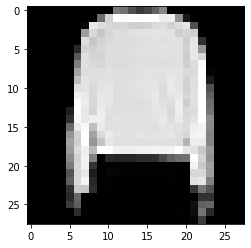

In [7]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

**Описание датасета:**

0 -- футболка/топ;

1 -- Шорты;

2 -- Свитер;

3 -- Платье;

4 -- Плащ;

5 -- Сандали;

6 -- Рубашка;

7 -- Кроссовки;

8 -- Сумка;

9 -- Ботинки.

## 1. Подготовка данных<a id='section_1'></a>

Проведем нормализацию датасетов

In [8]:
# Нормировка
X_train = X_train / X_train.max()
X_test = X_test / X_train.max()
X_train.min(), X_train.max()

(0.0, 1.0)

In [9]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# преобразование меток класса к категориальному типу
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [12]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 2. Исследование двухслойной нейросети в зависимости от числа нейронов в слое<a id='section_2'></a>

Построим двухслойную нейронную сеть и исследуем значение метрики accuracy в зависимоти от числа нейронов в слоях

In [13]:
%%time

dense_1_neurons_list = [i for i in range(50, 301, 5)]

metric_df = pd.DataFrame() 

for dense_1_num_neurons in dense_1_neurons_list:
    #инициализация модели
    model = Sequential([
    Dense(dense_1_num_neurons, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

    #компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    #обучение модели
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32, 
                    verbose=0, 
                    validation_data=(X_test, y_test))
    
    #оценка качества модели
    train_metric = history.history['accuracy'][-1]
    test_metric = history.history['val_accuracy'][-1]
   
    metric_df = metric_df.append({'dense_1_num_neurons': dense_1_num_neurons,
                                  'train_accuracy': train_metric, 
                                  'test_accuracy': test_metric}, ignore_index=True)
    
metric_df.sort_values(by='test_accuracy',ascending=False)

Wall time: 11min 47s


,dense_1_num_neurons,test_accuracy,train_accuracy
16,130.0,0.8719,0.893367
28,190.0,0.8694,0.893333
49,295.0,0.8691,0.894017
33,215.0,0.8677,0.893550
47,285.0,0.8669,0.894733
30,200.0,0.8669,0.893967
44,270.0,0.8665,0.895117
35,225.0,0.8665,0.893433
32,210.0,0.8659,0.893583
45,275.0,0.8651,0.894500


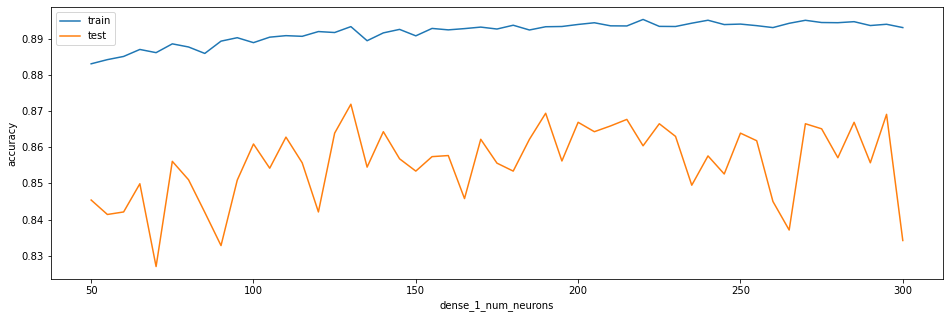

In [15]:
plt.figure(figsize=(16, 5))
plt.plot(metric_df['dense_1_num_neurons'], metric_df['train_accuracy'], label = 'train')
plt.plot(metric_df['dense_1_num_neurons'], metric_df['test_accuracy'],label = 'test')
plt.xlabel('dense_1_num_neurons')
plt.ylabel('accuracy')
plt.legend(loc = 'best')
plt.show()

**Вывод:** при увеличении числа нейронов значение accuracy возрастает не монотонно. Лучшее значение accuracy на тесте при числе нейронов = 130.

## 3. Исследование нейросети в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров)<a id='section_3'></a>

In [18]:
#сводная таблица метрик моделей
metric_nn = pd.DataFrame() 

### 2-х слойная нейронная сеть

In [19]:
#инициализация модели
model_2 = Sequential([
    Dense(130, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model_2.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 130)               102050    
                                                                 
 dense_105 (Dense)           (None, 10)                1310      
                                                                 
Total params: 103,360
Trainable params: 103,360
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time

#компиляция модели
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#обучение модели
history_2 = model_2.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=0, 
                    validation_data=(X_test, y_test))

#метрики модели
train_metric = history_2.history['accuracy'][-1]
test_metric = history_2.history['val_accuracy'][-1]

#результирующий датасет
metric_nn = metric_nn.append({'Num_of_layer': 2,
                              'Total_params': 103360,
                              'train_accuracy': train_metric, 
                              'test_accuracy': test_metric}, ignore_index=True)
    
metric_nn.sort_values(by='test_accuracy',ascending=False)

Wall time: 33.5 s


,Num_of_layer,Total_params,test_accuracy,train_accuracy
0,2.0,103360.0,0.8595,0.892183


### 3-х слойная нейронная сеть

In [21]:
#инициализация модели
model_3 = Sequential([
    Dense(122, input_shape=(28 * 28,), activation='relu'),
    Dense(57, activation='relu'),
    Dense(10, activation='sigmoid')
])

model_3.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 122)               95770     
                                                                 
 dense_107 (Dense)           (None, 57)                7011      
                                                                 
 dense_108 (Dense)           (None, 10)                580       
                                                                 
Total params: 103,361
Trainable params: 103,361
Non-trainable params: 0
_________________________________________________________________


In [22]:
%%time

#компиляция модели
model_3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#обучение модели
history_3 = model_3.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=0, 
                    validation_data=(X_test, y_test))

#метрики модели
train_metric = history_3.history['accuracy'][-1]
test_metric = history_3.history['val_accuracy'][-1]

#результирующий датасет
metric_nn = metric_nn.append({'Num_of_layer': 3,
                              'Total_params': 103361,
                              'train_accuracy': train_metric, 
                              'test_accuracy': test_metric}, ignore_index=True)
    
metric_nn.sort_values(by='test_accuracy',ascending=False)

Wall time: 33.1 s


,Num_of_layer,Total_params,test_accuracy,train_accuracy
0,2.0,103360.0,0.8595,0.892183
1,3.0,103361.0,0.8434,0.890300


### 5-и слойная нейронная сеть

In [23]:
#инициализация модели
model_5 = Sequential([
    Dense(110, input_shape=(28 * 28,), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(14, activation='relu'),
    Dense(10, activation='sigmoid')
])

model_5.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 110)               86350     
                                                                 
 dense_110 (Dense)           (None, 100)               11100     
                                                                 
 dense_111 (Dense)           (None, 50)                5050      
                                                                 
 dense_112 (Dense)           (None, 14)                714       
                                                                 
 dense_113 (Dense)           (None, 10)                150       
                                                                 
Total params: 103,364
Trainable params: 103,364
Non-trainable params: 0
_________________________________________________________________


In [24]:
%%time

#компиляция модели
model_5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#обучение модели
history_5 = model_5.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=0, 
                    validation_data=(X_test, y_test))

#метрики модели
train_metric = history_5.history['accuracy'][-1]
test_metric = history_5.history['val_accuracy'][-1]

#результирующий датасет
metric_nn = metric_nn.append({'Num_of_layer': 5,
                              'Total_params': 103364,
                              'train_accuracy': train_metric, 
                              'test_accuracy': test_metric}, ignore_index=True)
    
metric_nn.sort_values(by='test_accuracy',ascending=False)

Wall time: 35.9 s


,Num_of_layer,Total_params,test_accuracy,train_accuracy
0,2.0,103360.0,0.8595,0.892183
2,5.0,103364.0,0.8447,0.889067
1,3.0,103361.0,0.8434,0.890300


### 10-и слойная нейронная сеть

In [25]:
#инициализация модели
model_10 = Sequential([
    Dense(100, input_shape=(28 * 28,), activation='relu'),
    Dense(80, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(50, activation='relu'),
    Dense(40, activation='relu'),
    Dense(29, activation='relu'),
    Dense(28, activation='relu'),
    Dense(29, activation='relu'),
    Dense(10, activation='sigmoid')
])

model_10.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 100)               78500     
                                                                 
 dense_115 (Dense)           (None, 80)                8080      
                                                                 
 dense_116 (Dense)           (None, 60)                4860      
                                                                 
 dense_117 (Dense)           (None, 60)                3660      
                                                                 
 dense_118 (Dense)           (None, 50)                3050      
                                                                 
 dense_119 (Dense)           (None, 40)                2040      
                                                                 
 dense_120 (Dense)           (None, 29)              

In [26]:
%%time

#компиляция модели
model_10.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#обучение модели
history_10 = model_10.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=0, 
                    validation_data=(X_test, y_test))

#метрики модели
train_metric = history_10.history['accuracy'][-1]
test_metric = history_10.history['val_accuracy'][-1]

#результирующий датасет
metric_nn = metric_nn.append({'Num_of_layer': 10,
                              'Total_params': 103360,
                              'train_accuracy': train_metric, 
                              'test_accuracy': test_metric}, ignore_index=True)
    
metric_nn.sort_values(by='test_accuracy',ascending=False)

Wall time: 38 s


,Num_of_layer,Total_params,test_accuracy,train_accuracy
0,2.0,103360.0,0.8595,0.892183
2,5.0,103364.0,0.8447,0.889067
1,3.0,103361.0,0.8434,0.890300
3,10.0,103360.0,0.8219,0.876000


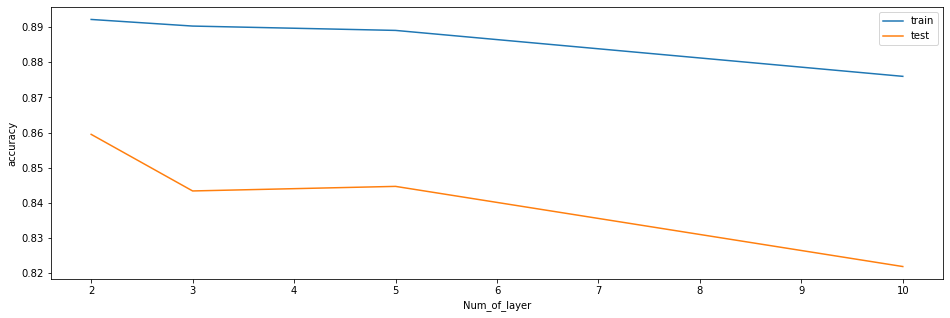

In [27]:
plt.figure(figsize=(16, 5))
plt.plot(metric_nn['Num_of_layer'], metric_nn['train_accuracy'], label = 'train')
plt.plot(metric_nn['Num_of_layer'], metric_nn['test_accuracy'],label = 'test')
plt.xlabel('Num_of_layer')
plt.ylabel('accuracy')
plt.legend(loc = 'best')
plt.show()

**Вывод:** при близком числе тренируемых параметров с увеличением числа слоев значение accuracy на тесте не монотонно убывает. Оптимальное значение числа слоев = 2.

## 4. Проверка работы разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.3<a id='section_4'></a>

In [36]:
#Лучшая модель из пункта 3
model_2.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 130)               102050    
                                                                 
 dense_105 (Dense)           (None, 10)                1310      
                                                                 
Total params: 103,360
Trainable params: 103,360
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_2.get_config()

{'name': 'sequential_52',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_104_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_104',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 130,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_105',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}

In [38]:
loss, metric = model_2.evaluate(X_test, y_test, batch_size=10)
loss, metric

1000/1000 [==============================] - 1s 884us/step - loss: 57.9261 - accuracy: 0.8595


(57.92610168457031, 0.859499990940094)

Проведем эксперимент с оптимизаторами SGD, Adam, RMSProp для модели model_2

Epoch 1/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.5895 - accuracy: 0.7987 - val_loss: 90.3675 - val_accuracy: 0.7888
Epoch 2/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.4404 - accuracy: 0.8470 - val_loss: 83.6141 - val_accuracy: 0.8047
Epoch 3/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.4013 - accuracy: 0.8598 - val_loss: 84.4865 - val_accuracy: 0.7975
Epoch 4/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.3766 - accuracy: 0.8661 - val_loss: 77.9972 - val_accuracy: 0.8086
Epoch 5/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.3594 - accuracy: 0.8715 - val_loss: 64.9657 - val_accuracy: 0.8304
Epoch 1/5
6000/6000 [==============================] - 8s 1ms/step - loss: 0.4847 - accuracy: 0.8259 - val_loss: 56.1730 - val_accuracy: 0.8447
Epoch 2/5
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3648 - accuracy: 0.8679 - val_loss: 65.7297 - val_accuracy:

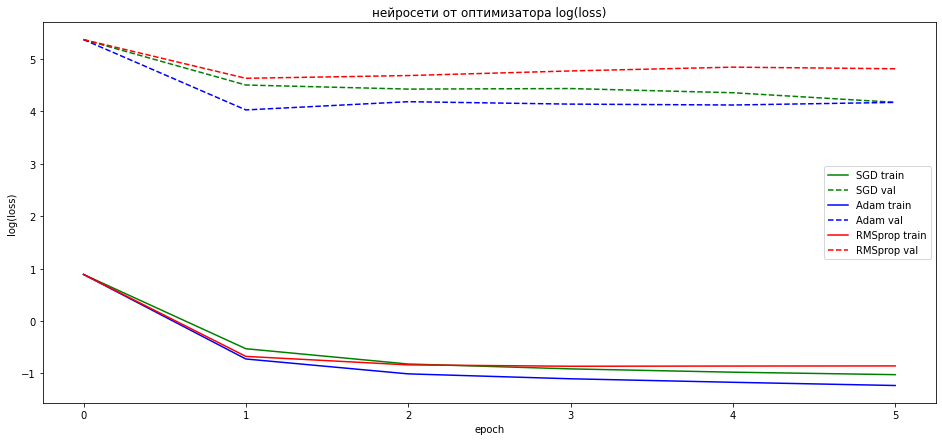

Wall time: 2min 14s


In [40]:
%%time

#сводная таблица метрик моделей
metric_opt_nn = pd.DataFrame() 
train_metric_opt_list=[]
test_metric_opt_list=[]

# модели сохраняем в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 5
batch_size = 10

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                             keras.optimizers.adam_v2.Adam(),
                             keras.optimizers.rmsprop_v2.RMSprop()]):
    
    # создаем рабочую модель  model_opt_i с зафиксированными весами
    import tensorflow as tf
    tf.random.set_seed(1)
    
    model_opt_i = Sequential([
        Dense(130, activation='relu', input_shape=(784,)),
        Dense(10, activation='sigmoid')
    ])
    
    # компилируем model_opt_i с одним из оптимизаторов
    model_opt_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
     # вычисляем ошибку для model_opt_i без обучения
    h0_train = model_opt_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_opt_i.evaluate(X_test, y_test, verbose=0)
    
    # проводим обучение модели 
    h = model_opt_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    #оценка качества модели
    train_metric_opt = h.history['accuracy'][-1]
    test_metric_opt = h.history['val_accuracy'][-1]
    
    train_metric_opt_list.append(train_metric_opt)
    test_metric_opt_list.append(test_metric_opt)
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_opt_i
        
    metric_opt_nn = metric_opt_nn.append({'optimizer': i_optim.get_config()['name'],
                                           'train_accuracy': train_metric_opt_list[i], 
                                           'test_accuracy': test_metric_opt_list[i]}, 
                                            ignore_index=True)
    
     # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_opt_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_opt_i.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [41]:
metric_opt_nn.sort_values(by='test_accuracy',ascending=False)

,optimizer,test_accuracy,train_accuracy
1,Adam,0.8630,0.89065
2,RMSprop,0.8582,0.87870
0,SGD,0.8304,0.87150


**Вывод:** наименьшее значение loss на тесте имеет модель с оптимизатором Adam. Оптимальное значение оптимизатора Adam.

## 5. Вывод о факторах, влиющих на улучшение метрики качества нейросети на тестовом наборе<a id='section_5'></a>

Анализ, проведенный в пуктах 2--4 показывает, что на повышение метрики качества нейросети влияет:

1. увеличение числа нейронов в слое (для двухслойной нейронной сети);

2. уменьшение числа слоев (при сохранении общего числа обучаемых параметров);

3. выбор оптимизатора Adam (при компиляции модели).

## 6. Матрица ошибок по классам и оценка качества модели по каждому классу отдельно (полнота и точность)<a id='section_6'></a>

Составим матрицу ошибок для лучшей модели из пункта 5

In [156]:
model_best = models['Adam']
model_best.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 130)               102050    
                                                                 
 dense_137 (Dense)           (None, 10)                1310      
                                                                 
Total params: 103,360
Trainable params: 103,360
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_best.get_config()

{'name': 'sequential_62',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_136_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_136',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 130,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_137',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}

In [158]:
loss, metric = model_best.evaluate(X_test, y_test, batch_size=10)
loss, metric

1000/1000 [==============================] - 1s 1ms/step - loss: 64.8598 - accuracy: 0.8630


(64.85977172851562, 0.8629999756813049)

Сделаем предсказания модели model_best

In [159]:
#предсказания для всех тестовых данных
predictions = model_best.predict(X_test)
predictions.shape, predictions

((10000, 10),
 array([[0., 0., 0., ..., 1., 0., 1.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [160]:
#предсказания классов для всех тестовых данных
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([7, 0, 1, ..., 8, 1, 5], dtype=int64)

In [161]:
#действительные тестовые классы
y_test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Составим матрицу ошибок модели model_best

In [162]:
#Матрица ошибок
conf_matrix = confusion_matrix(y_test_labels, pred_labels, labels = [0,1,2,3,4,5,6,7,8,9])
print('Матрица ошибок')
print(conf_matrix)

Матрица ошибок
[[970  12   3  10   1   0   1   0   3   0]
 [ 18 977   0   4   0   0   1   0   0   0]
 [407  40 536   9   6   0   2   0   0   0]
 [192 130  11 663   2   0   0   0   2   0]
 [ 79  57 682 152  30   0   0   0   0   0]
 [  4   1   0   0   0 975   0  10   1   9]
 [522  19 369  28  59   0   2   0   1   0]
 [  0   0   0   0   0 280   0 718   0   2]
 [ 85  10  16   1  26   3  54   8 797   0]
 [  2   0   0   0   0 165   0 731   0 102]]


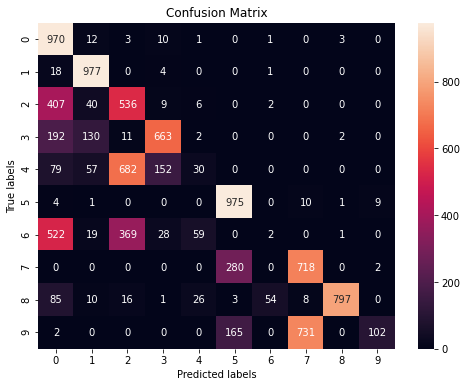

In [163]:
#визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [164]:
#Мультиклассовая матрица ошибок
multi_conf_matrix = multilabel_confusion_matrix(y_test_labels, pred_labels, labels = [0,1,2,3,4,5,6,7,8,9])
print('Матрица ошибок для мультиклассовой классификации')
print(multi_conf_matrix)

Матрица ошибок для мультиклассовой классификации
[[[7691 1309]
  [  30  970]]

 [[8731  269]
  [  23  977]]

 [[7919 1081]
  [ 464  536]]

 [[8796  204]
  [ 337  663]]

 [[8906   94]
  [ 970   30]]

 [[8552  448]
  [  25  975]]

 [[8942   58]
  [ 998    2]]

 [[8251  749]
  [ 282  718]]

 [[8993    7]
  [ 203  797]]

 [[8989   11]
  [ 898  102]]]


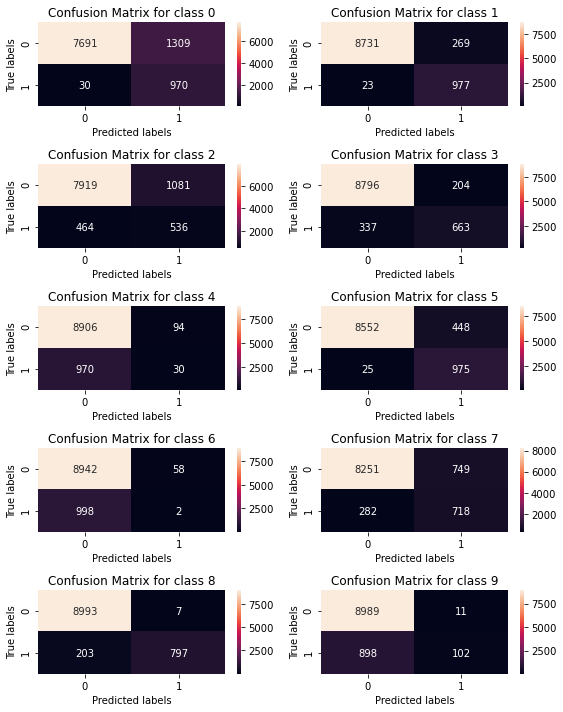

In [165]:
#визуализация матриц ошибок для каждого класса
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(8, 10)
for i in range(10):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='g', ax=axes[i//2][i%2])
    axes[i//2][i%2].set_xlabel('Predicted labels')
    axes[i//2][i%2].set_ylabel('True labels')
    axes[i//2][i%2].set_title(f'Confusion Matrix for class {i}')
    
plt.tight_layout()

Оценим качество модели по каждому классу отдельно 

In [168]:
print(f"Classification report for model_best:\n"
    f"{classification_report(y_test_labels, pred_labels, labels=[0,1,2,3,4,5,6,7,8,9])}\n")

Classification report for model_best:
              precision    recall  f1-score   support

           0       0.43      0.97      0.59      1000
           1       0.78      0.98      0.87      1000
           2       0.33      0.54      0.41      1000
           3       0.76      0.66      0.71      1000
           4       0.24      0.03      0.05      1000
           5       0.69      0.97      0.80      1000
           6       0.03      0.00      0.00      1000
           7       0.49      0.72      0.58      1000
           8       0.99      0.80      0.88      1000
           9       0.90      0.10      0.18      1000

    accuracy                           0.58     10000
   macro avg       0.56      0.58      0.51     10000
weighted avg       0.56      0.58      0.51     10000




**Вывод:** лучше всего модель справляется с распознаванием объектов 8-го класса (сумки), хуже всего -- объектов 6-го класса (рубашки).